# Figures for paper

28-Feb, 20-Mar

- 3:30 hour runs
- 3 distinct CV distributions, 3 cost functions runs
- degenaracy of solutions runs

In [1]:
import sys
import glob
import numpy as np
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, "/scratch/l/lfefebvr/noorir/model/")

OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

# Helper Functions

In [2]:

def plot_ts(nodes, all_ts):
    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])
    plt.show()
    

# Choosing which jobs to analyze

In [3]:
JOB = ['990797','990798', '990799',
       '1061083', '1061085','1061086',
       '1061632','1061633','1061635']
NTASKS =[120]
NUM_JOBS = len(JOB)

# jobs for 3 diff cases runs
# correlation, pli, ploi+corr

In [5]:
# JOB = ['1071214', '1071215', '1071216', '1071217',
#        '1069947', '1069948', '1069950', '1069951',
#        '1070142', '1070143', '1070144', '1070145']

# degeneracy of sols all 3 cv cases using pli+corr cost function

# Saving the names of the variable load files for each run

In [7]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 9


{'1061083': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-20/1061083/load_genvars_delays4pli.py',
 '1061085': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-20/1061085/load_genvars_delays5pli.py',
 '1061086': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-20/1061086/load_genvars_delays6pli.py',
 '1061632': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-20/1061632/load_genvars_delays_pli_corr4.py',
 '1061633': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-20/1061633/load_genvars_delays_pli_corr5.py',
 '1061635': '/scratch/l/lfefebvr/noorir/model/Output/2019-03-20/1061635/load_genvars_delays_pli_corr6.py',
 '990797': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-28/990797/load_genvars_delays4.py',
 '990798': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-28/990798/load_genvars_delays5.py',
 '990799': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-28/990799/load_genvars_delays6.py'}

# Creating a dictionary to hold all the best solution vectors (all_res)

In [8]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) in NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res_ = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res_)
    else:
        print("Error", job)
        break

0  Job: 990797, lowest MSE:  0.07338092108358579
1  Job: 990798, lowest MSE:  0.004047887415854594
2  Job: 990799, lowest MSE:  1.232595164407831e-32
3  Job: 1061083, lowest MSE:  0.007726127439622802
4  Job: 1061085, lowest MSE:  0.011749916991653358
5  Job: 1061086, lowest MSE:  0.00423656239233128
6  Job: 1061632, lowest MSE:  0.053031927851486665
7  Job: 1061633, lowest MSE:  0.024850200161823106
8  Job: 1061635, lowest MSE:  0.04030531322479117


# Heatmaps - target CV vs estimated CV

- list of all mse CV values (all_mse)
- dictionary of all target CV matrices (all_res_true)

--------------------------CORR------------------------------------
990797  true vs est: mse =  27.3241232755


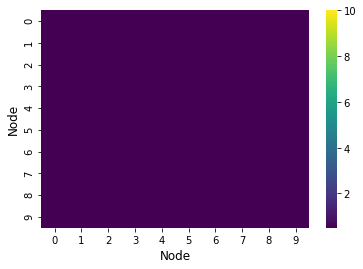

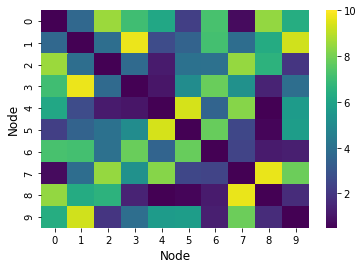

--------------------------CORR------------------------------------


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in reciprocal


990798  true vs est: mse =  13.8053373918


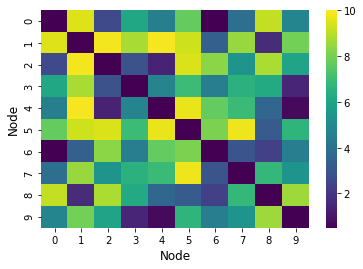

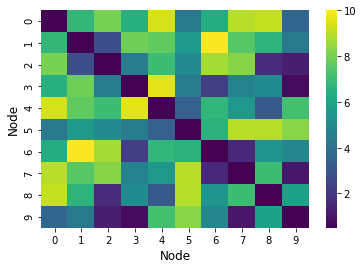

--------------------------CORR------------------------------------
990799  true vs est: mse =  13.8724006017


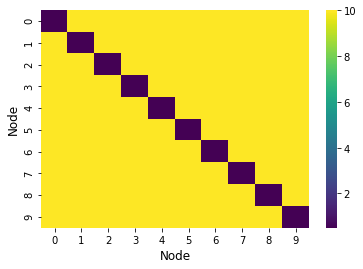

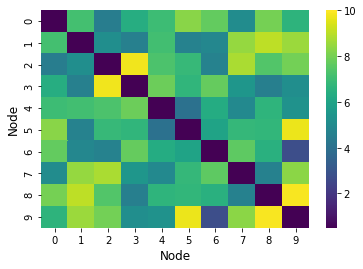

--------------------------PLI-----------------------------------------
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1061083  true vs est: mse =  29.8103247875


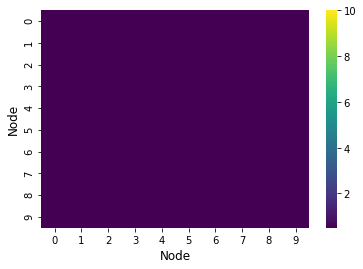

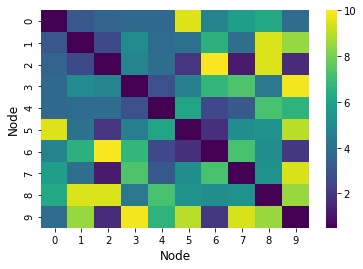

--------------------------PLI-----------------------------------------
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1061085  true vs est: mse =  10.7330422929


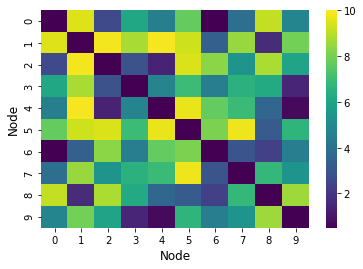

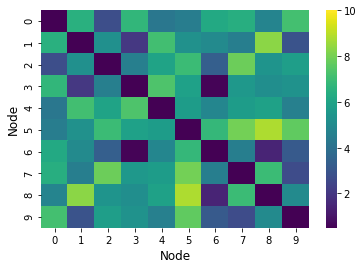

--------------------------PLI-----------------------------------------
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1061086  true vs est: mse =  38.8969202776


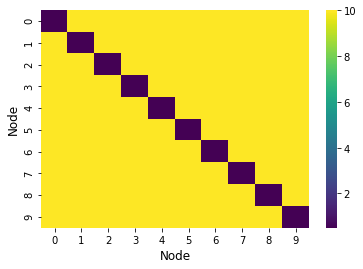

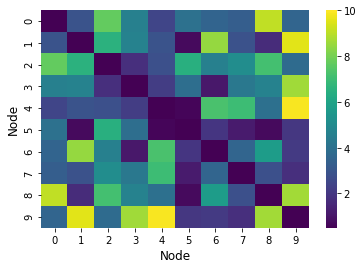

--------------------------PLI+CORR------------------------------------
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1061632  true vs est: mse =  21.5763512039


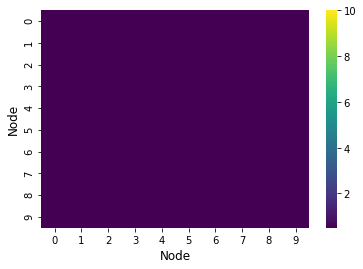

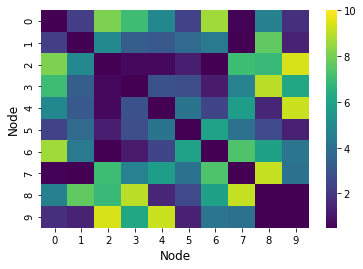

--------------------------PLI+CORR------------------------------------
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1061633  true vs est: mse =  11.7068203802


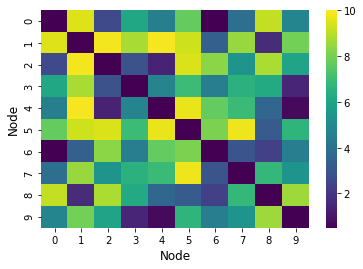

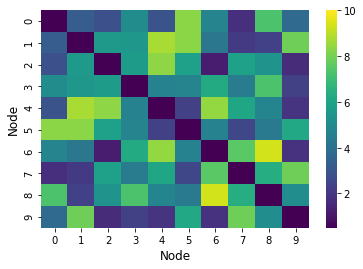

--------------------------PLI+CORR------------------------------------
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1061635  true vs est: mse =  20.367953423


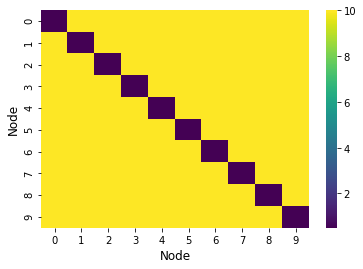

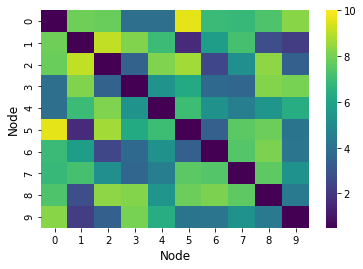

In [9]:
all_mse = []
all_res_true = {} #dictionary of all the target arrays

##########################################################################
def plot_heat_cv(data, num_i = 0):
    """
    data is on the order of mm/s
    """
    %matplotlib inline
    sns.heatmap(hf.p2matrix(data,10)/1000, vmax = 10, vmin = 0.5, cmap = "viridis")
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    #plt.savefig(JOB[num_i]+"est_cv.png", facecolor = "None")
    plt.show()
###########################################################################

for i in range(NUM_JOBS):
    
    # visual dividers
    if i in range(0,3):
        print("--------------------------CORR------------------------------------")
    if i in range(3,6):
        print("--------------------------PLI-------------------------------------")
    elif i in range(6,9):
        print("------------------------PLI+CORR----------------------------------")
        
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    all_res_true[JOB[i]] = c_mat
    if i == 1:
        master_tract = tract_mat
    
    # Calculate MSE between true and target for each
    thing = np.triu(np.reciprocal(all_res_true[JOB[i]], where = all_res_true[JOB[i]] >0),1).ravel()
    true_cv_vec = thing[thing != 0]
    err = hf.mse(true_cv_vec/1000,all_res[JOB[i]]/1000)
    all_mse.append(err)
    print(JOB[i], " true vs est: mse = ", err)
    #if you want to white-out the diagonals:
    #sns.heatmap(hf.p2matrix(thing[thing != 0],10)/1000, mask = hf.p2matrix(thing[thing != 0],10)/1000 ==0, 
    #            vmax = 10, vmin = 0.5, cmap = "viridis")
    plot_heat_cv(true_cv_vec,i)
    plot_heat_cv(all_res[JOB[i]],i)

In [ ]:
all_mse

In [ ]:
#save all matrices of all res
# for i in range(len(JOB)):
#     np.save(JOB[i],hf.p2matrix(all_res[JOB[i]],10)/1000)

# Target Data - Plot of MEG time series and Correlation Matrix

In [ ]:
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read())
    print(JOB[i])
    
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()


# Histograms of all the estimated CV estimates

- mean and std of distribution for each network estimation (the #'s that show on top of the plots):
- gr_means = []
- gr_std = []

In [ ]:
#Estimates

gr_means = []
gr_std = []
for cv in range(NUM_JOBS):
    
    # visual dividers
    if cv in range(0,3):
        print("--------------------------CORR------------------------------------")
    if cv in range(3,6):
        print("--------------------------PLI-----------------------------------------")
    elif cv in range(6,9):
        print("--------------------------PLI+CORR------------------------------------")
        
    print(JOB[cv], "cv estimate distribution")
    # the histogram of the data
    n, bins, patches = plt.hist(all_res[JOB[cv]]/1000, density=True, facecolor='blue', alpha=0.5, range = (0.5,10))
    
    mu = np.average(all_res[JOB[cv]]/1000)
    sigma = np.std(all_res[JOB[cv]]/1000)
    
    gr_means.append(mu)
    gr_std.append(sigma)
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel("Conduction Velocity (m/s)", fontsize = 'x-large')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.ylabel('Normalized Count', fontsize = 'x-large')
    plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()
    
    print(JOB[cv], "signal delay estimate distribution")
    trac = np.triu(master_tract,1).ravel()
    trac= trac[trac > 0]
    # the histogram of the data
    n, bins, patches = plt.hist((trac/all_res[JOB[cv]])*1000, density=True, facecolor='blue', alpha=0.5, range = (0,100))
    
    mu = np.average((trac/all_res[JOB[cv]])*1000)
    sigma = np.std((trac/all_res[JOB[cv]])*1000)
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel("Signal Delays (ms)", fontsize = 'x-large')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.ylabel('Normalized Count', fontsize = 'x-large')
    plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()


# Target CV and Signal Delays

In [ ]:
for cv in range(NUM_JOBS):    
    # visual dividers
    if cv in range(0,3):
        print("--------------------------CORR------------------------------------")
    if cv in range(3,6):
        print("--------------------------PLI-----------------------------------------")
    elif cv in range(6,9):
        print("--------------------------PLI+CORR------------------------------------")
        
    # the histogram of the data
    print(JOB[cv], "cv true distribution")
    vec= np.reciprocal(all_res_true[JOB[cv]], where = all_res_true[JOB[0]] > 0 )/1000
    vec = np.triu(vec,1).ravel()
    vec = vec[vec != 0]
    if vec.shape[0] ==45:
        n, bins, patches = plt.hist(vec, density=True, facecolor='blue', alpha=0.5, range = (0.5,10))

        mu = np.average(vec)
        sigma = np.std(vec)
        # add a 'best fit' line
        y = mlab.normpdf(bins, mu, sigma)
        plt.plot(bins, y, 'r--')
        plt.xlabel("Conduction Velocity (m/s)", fontsize = 'x-large')
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.ylabel('Normalized Count', fontsize = 'x-large')
        plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

        # Tweak spacing to prevent clipping of ylabel
        plt.subplots_adjust(left=0.15)
        plt.show()
        

    # the histogram of the data
    print(JOB[cv], "signal delay true distribution")
    vec= np.reciprocal(all_res_true[JOB[cv]], where = all_res_true[JOB[0]] > 0 )/1000
    vec = np.triu(vec,1).ravel()
    vec = vec[vec != 0]
    trac = np.triu(tract_mat,1).ravel()
    trac= trac[trac > 0]
    if vec.shape[0] ==45:
        n, bins, patches = plt.hist(trac/vec, density=True, facecolor='blue', alpha=0.5, range = (0,100))

        mu = np.average(trac/vec)
        sigma = np.std(trac/vec)
        # add a 'best fit' line
        y = mlab.normpdf(bins, mu, sigma)
        plt.plot(bins, y, 'r--')
        plt.xlabel("Signal Delays (ms)", fontsize = 'x-large')
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.ylabel('Normalized Count', fontsize = 'x-large')
        plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

        # Tweak spacing to prevent clipping of ylabel
        plt.subplots_adjust(left=0.15)
        plt.show()

# Looking at solution matrices + time series

# 1 : CORRELATION


In [ ]:
for i in range(0,3):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    print(JOB[i])
    cmat_old_, ue_array_, res_, vmax_ , vmin_ = hf.residuals_cw_corr(all_res[JOB[i]], wc_params, nodes, targ_data, w_mat,
                                            skip, wc_seed, evol_params['optim'], tract_mat, 
                                            heavyside= evol_params['heavi'],plot ="cw")
    
    #plot the correlation matrix
    import seaborn as sns
    skip = 200
    exp_data = hf.plot_cor_mat(ue_array_, nodes, skip)
    np.fill_diagonal(exp_data, 0)
    plt.figure()
    sns.heatmap(exp_data, cmap ="viridis", vmax = 1, vmin =-1)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
#     plt.savefig(JOB[i]+"corr.png", facecolor = "None")
    plt.show()
    
    
    #plot the true correlation matrix
    import seaborn as sns
    skip = 200
    plt.figure()
    sns.heatmap(targ_data, cmap ="viridis", vmax = 1, vmin =-1)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
#     plt.savefig(JOB[i]+"corr_true.png", facecolor = "None")
    plt.show()
    print("MSE", res_)

    #experimental time series
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array_[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array_, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
#     plt.savefig(JOB[i]+"ts.png", facecolor = "None")
    plt.show()
    

# 2 : PLI

In [ ]:
for i in range(3,6):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    print(JOB[i])
    cmat_old_, ue_array_, res_, exp_pli = hf.residuals_pli(all_res[JOB[i]], wc_params, fs, nodes, targ_data, w_mat, chunk,
                                            skip, wc_seed, evol_params['optim'], tract_mat, 
                                            evol_params['heavi'], fmin, fmax, plot = True)
    
    #plot the pli matrix
    import seaborn as sns
    skip = 200
    exp_data = exp_pli
    for row in range(1,nodes):
        for col in range(0, row):
            exp_data[col,row] = exp_data[row,col]
    
    plt.figure()
    sns.heatmap(exp_data, cmap ="viridis", vmax = 1, vmin =0)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
#     plt.savefig(JOB[i]+"pli.png", facecolor = "None")
    plt.show()
    print(exp_data)
    
    #plot the true pli matrix
    import seaborn as sns
    skip = 200
    
    exp_data = targ_data
    for row in range(1,nodes):
        for col in range(0, row):
            exp_data[col,row] = exp_data[row,col]

            
    plt.figure()
    sns.heatmap(exp_data, cmap ="viridis", vmax = 1, vmin =0)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
#     plt.savefig(JOB[i]+"pli_true.png", facecolor = "None")
    plt.show()
    print("MSE", res_)


    #experimental time series
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array_[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array_, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
#     plt.savefig(JOB[i]+"ts.png", facecolor = "None")
    plt.show()

# 3 : CORRELATION + PLI

In [ ]:
for i in range(6,9):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    print(JOB[i])
    cmat_old_, ue_array_, res_, exp_data_pli_, exp_data_corr_ = hf.residuals_pli_corr(all_res[JOB[i]], wc_params, fs, nodes,
                                                                    targ_data_corr, targ_data_pli, w_mat, chunk, skip, wc_seed,
                                                                     evol_params['optim'], tract_mat,
                                                                     evol_params['heavi'], 
                                                                     fmin, fmax, plot = True)
    
    #plot the correlation matrix
    import seaborn as sns
    skip = 200
    exp_data = hf.plot_cor_mat(ue_array_, nodes, skip)
    np.fill_diagonal(exp_data_corr_, 0)
    plt.figure()
    sns.heatmap(exp_data_corr_, cmap ="viridis", vmax = 1, vmin =-1)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
#     plt.savefig(JOB[i]+"corr.png", facecolor = "None")

    plt.show()
    
    #plot the pli matrix
    import seaborn as sns
    skip = 200
    
    exp_data = exp_data_pli_
    for row in range(1,nodes):
        for col in range(0, row):
            exp_data[col,row] = exp_data[row,col]
            
    plt.figure()
    sns.heatmap(exp_data, cmap ="viridis", vmax = 1, vmin =0)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
#     plt.savefig(JOB[i]+"pli.png", facecolor = "None")

    plt.show()
    print("MSE", res_)

    #experimental time series
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array_[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
#     plt.savefig(JOB[i]+"ts.png", facecolor = "None")

    plt.show()

#  break

In [ ]:
true[true!=0]

In [ ]:
thing  = np.triu(np.reciprocal(all_res_true[JOB[0]]),1).ravel()
thing.shape

In [ ]:
hf.p2matrix(all_res[JOB[i]], 10).shape

In [ ]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure

top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

In [ ]:
# ALL THE RESULTS AT ONCE

for i in range(1, 4):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    print(JOB[i])
    final_res = hf.residuals_cw_corr(all_res[JOB[i]], wc_params, nodes, targ_data, MAT,
                                            skip, wc_seed, evol_params['optim'], tract_mat, heavyside= evol_params['heavi'],
                                     plot ="cw", vmax_= 10, vmin_=0.5)

"""  
    ind = 0
    mat = np.ones((nodes, nodes))
    c = np.reciprocal(all_res[JOB[i]])
    for row in range(0,nodes):
        
        for col in range(row+1, nodes):
            mat[row,col] =c[ind]
            mat[col,row] = c[ind]
            ind += 1
    np.fill_diagonal(mat,0)
    #mat[0:5,5:10] =0
    #mat[5:10,0:5] =0
    plt.figure()
    plt.hist(mat, range=(3000,7000))
    plt.show()
    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(c), np.min(c)))
    plt.figure()
    sns.heatmap(mat, cmap = "viridis", vmax =7000, vmin = 3000)"""

In [ ]:
# ALL THE RESULTS AT ONCE

for i in range(4, NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    print(JOB[i])
    final_res = hf.residuals_cw_corr(all_res[JOB[i]], wc_params, nodes, targ_data, MAT,
                                            skip, wc_seed, evol_params['optim'], tract_mat, heavyside= evol_params['heavi'],
                                     plot ="cw", vmax_= 5, vmin_=0.5)

"""  
    ind = 0
    mat = np.ones((nodes, nodes))
    c = np.reciprocal(all_res[JOB[i]])
    for row in range(0,nodes):
        
        for col in range(row+1, nodes):
            mat[row,col] =c[ind]
            mat[col,row] = c[ind]
            ind += 1
    np.fill_diagonal(mat,0)
    #mat[0:5,5:10] =0
    #mat[5:10,0:5] =0
    plt.figure()
    plt.hist(mat, range=(3000,7000))
    plt.show()
    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(c), np.min(c)))
    plt.figure()
    sns.heatmap(mat, cmap = "viridis", vmax =7000, vmin = 3000)"""

In [ ]:
final_res

In [ ]:
sns.heatmap(tract_mat)

In [ ]:
sns.heatmap(targ_data, cmap="viridis", vmin = -1)

In [ ]:
c_mat


In [ ]:
tract_p = np.array(hf.matrix2p(tract_mat))

In [ ]:
all_res[JOB[i]].shape

In [ ]:
tract_p.shape

In [ ]:
where = tract_p==0
c = all_res[JOB[i]][where]

In [ ]:
c.shape

In [ ]:
where

In [ ]:
plt.hist(c)
plt.show()

In [ ]:
np.mean(c)

In [ ]:
np.mean(all_res[JOB[i]])